In [1]:
# Load the libraries 

import pandas as pd
import numpy as np

import os

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
# import the json library to open the file  
  
# Opening JSON file


import json
  
# Opening JSON file
f = open('road-sb_200-mb_0-ph_0-min_10-1631207186.json',)
  

data = json.load(f)

In [3]:
# Print the data 

data


{'anomalies': [{'end': 928, 'start': 830, 'type': 'Speed bump'},
  {'end': 2111, 'start': 2008, 'type': 'Speed bump'},
  {'end': 3063, 'start': 2969, 'type': 'Speed bump'},
  {'end': 3772, 'start': 3664, 'type': 'Speed bump'},
  {'end': 5150, 'start': 4976, 'type': 'Speed bump'},
  {'end': 6428, 'start': 6323, 'type': 'Speed bump'},
  {'end': 7686, 'start': 7556, 'type': 'Speed bump'},
  {'end': 8651, 'start': 8473, 'type': 'Speed bump'},
  {'end': 9290, 'start': 9176, 'type': 'Speed bump'},
  {'end': 10793, 'start': 10670, 'type': 'Speed bump'},
  {'end': 11821, 'start': 11691, 'type': 'Speed bump'},
  {'end': 12762, 'start': 12590, 'type': 'Speed bump'},
  {'end': 14039, 'start': 13890, 'type': 'Speed bump'},
  {'end': 15155, 'start': 15029, 'type': 'Speed bump'},
  {'end': 16526, 'start': 16428, 'type': 'Speed bump'},
  {'end': 17511, 'start': 17389, 'type': 'Speed bump'},
  {'end': 18817, 'start': 18691, 'type': 'Speed bump'},
  {'end': 20065, 'start': 19925, 'type': 'Speed bump'},

In [4]:
# Create a dataframe contianing rot_acc_x, rot_acc_y and rot_acc_z features from the data

df = pd.DataFrame({'rot_acc_x' : data['rot_acc_x'],
                  'rot_acc_y' : data['rot_acc_y'],
                  'rot_acc_z' : data['rot_acc_z']})
df

,rot_acc_x,rot_acc_y,rot_acc_z
0,-0.131,0.179,9.748
1,-0.406,-0.291,9.944
2,-0.406,-0.213,10.415
3,-0.209,-0.056,10.493
4,-0.013,-0.095,10.336
...,...,...,...
151197,0.509,-1.393,10.102
151198,-0.119,-1.825,8.611
151199,-0.393,-2.453,10.141
151200,-0.550,-3.433,11.357


In [5]:
# Check the size of dataframe

df.shape

(151202, 3)

In [6]:
# Create an empty dataframe with two columns -index and speed. The speed from json file will be added to this dataframe


temp = pd.DataFrame(columns=['index', 'speed'])
temp

,index,speed


In [7]:
# Iterate over all the speed records one by one and added those to temp. Get the index value from start and end  of speed dictionary in json file.
# After 1st iteration, the 1st speed dictionary will become the temp. 
# After 2nd iteration, the 2nd speed dictionary will get added to the 1st file and the combined file will become the temp. 
# This will go on till the last speed dictionary and all the speed dictionary will be part of temp.




for dic in data['speed']:
    speed_df = pd.DataFrame({'index' : range(dic['start'], dic['end'] + 1),
                  'speed' : dic['speed']
                            })
    temp = pd.concat([temp, speed_df])
    temp.reset_index(drop = True, inplace = True)

temp

,index,speed
0,0,5.760
1,1,5.760
2,2,5.760
3,3,5.760
4,4,5.760
...,...,...
151197,151197,14.148
151198,151198,14.148
151199,151199,14.148
151200,151200,14.148


In [8]:
# linking the temp data with dataframe df


df = pd.concat([temp, df], axis = 1)
df

,index,speed,rot_acc_x,rot_acc_y,rot_acc_z
0,0,5.760,-0.131,0.179,9.748
1,1,5.760,-0.406,-0.291,9.944
2,2,5.760,-0.406,-0.213,10.415
3,3,5.760,-0.209,-0.056,10.493
4,4,5.760,-0.013,-0.095,10.336
...,...,...,...,...,...
151197,151197,14.148,0.509,-1.393,10.102
151198,151198,14.148,-0.119,-1.825,8.611
151199,151199,14.148,-0.393,-2.453,10.141
151200,151200,14.148,-0.550,-3.433,11.357


In [9]:
# Create an empty dataframe with two columns index and tag. The tag from json file will be added to this dataframe


temp = pd.DataFrame(columns=['index', 'tag'])
temp

,index,tag


In [10]:
# Iterate over all the anomalies records one by one and add those to temp. Get the index value from start and end key of anomalies dictionary in json file.
# After 1st iteration, the 1st anomalies dictionary will become the temp. 
# After 2nd iteration, the 2nd anomalies dictionary will get added to the 1st file and the combined file will become the temp. 
# This will go on till the last anomalies dictionary and all the anomalies dictionary will be part of temp.






for dic in data['anomalies']:
    tag_df = pd.DataFrame({'index' : range(dic['start'], dic['end'] + 1),
                  'tag' : dic['type']
                            })
    temp = pd.concat([temp, tag_df])
    temp.reset_index(drop = True, inplace = True)

temp

,index,tag
0,830,Speed bump
1,831,Speed bump
2,832,Speed bump
3,833,Speed bump
4,834,Speed bump
...,...,...
18549,150471,Speed bump
18550,150472,Speed bump
18551,150473,Speed bump
18552,150474,Speed bump


In [11]:
# Create a dataframe with index column starting from 0 to the shape of dataframe df. 
# This file will be merged with temp as temp contains only anomalies, we need to create the normal tag as well


index_df = pd.DataFrame({'index' : range(0, df.shape[0])})
index_df

,index
0,0
1,1
2,2
3,3
4,4
...,...
151197,151197
151198,151198
151199,151199
151200,151200


In [12]:
# Merge the temp dataframe with index_df, it will create na values wherever anomalies are not present.



tag_df = index_df.merge(temp, on='index', how = 'left')
tag_df = tag_df.fillna('Normal Road')

In [13]:
# Merge the tag_df with dataframe df


df = df.merge(tag_df, on='index')
df

,index,speed,rot_acc_x,rot_acc_y,rot_acc_z,tag
0,0,5.760,-0.131,0.179,9.748,Normal Road
1,1,5.760,-0.406,-0.291,9.944,Normal Road
2,2,5.760,-0.406,-0.213,10.415,Normal Road
3,3,5.760,-0.209,-0.056,10.493,Normal Road
4,4,5.760,-0.013,-0.095,10.336,Normal Road
...,...,...,...,...,...,...
151197,151197,14.148,0.509,-1.393,10.102,Normal Road
151198,151198,14.148,-0.119,-1.825,8.611,Normal Road
151199,151199,14.148,-0.393,-2.453,10.141,Normal Road
151200,151200,14.148,-0.550,-3.433,11.357,Normal Road


In [14]:
# Create an empty dataframe with 4 columns -index, vehicle, type and id. These info will be taken from json file


temp = pd.DataFrame(columns=['index', 'vehicle', 'type', 'id'])
temp

,index,vehicle,type,id


In [15]:
# data['metadata']['samples']

In [16]:
# Iterate over all the sample records in metadata dictionary one by one and add those to temp. Get the index value from length dictionary in json file.
# After 1st iteration, the 1st sample dictionary will become the temp. 
# After 2nd iteration, the 2nd sample dictionary will get added to the 1st file and the combined file will become the temp. 
# This will go on till the last sample dictionary and all the sample dictionary will be part of temp. 
# After end of this code, we will have index, vehicle name, type of road, and id_ of the record


i = 0
id_ = 0
for dic in data['metadata']['samples']:
    vehicle_df = pd.DataFrame({'index' : range(i, i + dic['length']),
                               'vehicle' : dic['vehicle'],
                               'type' : dic['type'],
                               'id_' : id_
                            })
    temp = pd.concat([temp, vehicle_df])
    temp.reset_index(drop = True, inplace = True)
    i = i + dic['length']
    id_ = id_ + 1

temp

,index,vehicle,type,id,id_
0,0,Toyota Corolla,Normal,NaN,0.0
1,1,Toyota Corolla,Normal,NaN,0.0
2,2,Toyota Corolla,Normal,NaN,0.0
3,3,Toyota Corolla,Normal,NaN,0.0
4,4,Toyota Corolla,Normal,NaN,0.0
...,...,...,...,...,...
151197,151197,Chevrolet Chevy,Normal,NaN,626.0
151198,151198,Chevrolet Chevy,Normal,NaN,626.0
151199,151199,Chevrolet Chevy,Normal,NaN,626.0
151200,151200,Chevrolet Chevy,Normal,NaN,626.0


In [17]:
# Merge the temp dataframe with dataframe df, this is the master dataframe


df = df.merge(temp, on='index')
df

,index,speed,rot_acc_x,rot_acc_y,rot_acc_z,tag,vehicle,type,id,id_
0,0,5.760,-0.131,0.179,9.748,Normal Road,Toyota Corolla,Normal,NaN,0.0
1,1,5.760,-0.406,-0.291,9.944,Normal Road,Toyota Corolla,Normal,NaN,0.0
2,2,5.760,-0.406,-0.213,10.415,Normal Road,Toyota Corolla,Normal,NaN,0.0
3,3,5.760,-0.209,-0.056,10.493,Normal Road,Toyota Corolla,Normal,NaN,0.0
4,4,5.760,-0.013,-0.095,10.336,Normal Road,Toyota Corolla,Normal,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
151197,151197,14.148,0.509,-1.393,10.102,Normal Road,Chevrolet Chevy,Normal,NaN,626.0
151198,151198,14.148,-0.119,-1.825,8.611,Normal Road,Chevrolet Chevy,Normal,NaN,626.0
151199,151199,14.148,-0.393,-2.453,10.141,Normal Road,Chevrolet Chevy,Normal,NaN,626.0
151200,151200,14.148,-0.550,-3.433,11.357,Normal Road,Chevrolet Chevy,Normal,NaN,626.0


In [18]:
# Save the df to master_df.csv  


df.to_csv('master_df.csv', index = False)

In [19]:
#anomalies, metadata, samples, rot_acc_x, rot_acc_y, rot_acc_z, speed, 
# 34378
#data

# Data Preprocessing

In [20]:
# Read the master_df


df = pd.read_csv('master_df.csv')
df

,index,speed,rot_acc_x,rot_acc_y,rot_acc_z,tag,vehicle,type,id,id_
0,0,5.760,-0.131,0.179,9.748,Normal Road,Toyota Corolla,Normal,NaN,0.0
1,1,5.760,-0.406,-0.291,9.944,Normal Road,Toyota Corolla,Normal,NaN,0.0
2,2,5.760,-0.406,-0.213,10.415,Normal Road,Toyota Corolla,Normal,NaN,0.0
3,3,5.760,-0.209,-0.056,10.493,Normal Road,Toyota Corolla,Normal,NaN,0.0
4,4,5.760,-0.013,-0.095,10.336,Normal Road,Toyota Corolla,Normal,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
151197,151197,14.148,0.509,-1.393,10.102,Normal Road,Chevrolet Chevy,Normal,NaN,626.0
151198,151198,14.148,-0.119,-1.825,8.611,Normal Road,Chevrolet Chevy,Normal,NaN,626.0
151199,151199,14.148,-0.393,-2.453,10.141,Normal Road,Chevrolet Chevy,Normal,NaN,626.0
151200,151200,14.148,-0.550,-3.433,11.357,Normal Road,Chevrolet Chevy,Normal,NaN,626.0


In [21]:
# Count the values count in tag column to check how many rows do we have for each tag


df['tag'].value_counts()

Normal Road    132648
Speed bump      18554
Name: tag, dtype: int64

In [22]:
# Count the values count in vehicle column to check how many rows do we have for each vehicle

df['vehicle'].value_counts()

Chevrolet Chevy       48360
Nissan Small Truck    32820
VW Jetta              26505
Chevrolet S10         25809
Toyota Corolla        17708
Name: vehicle, dtype: int64

In [23]:
# Drop the duplicate values of vehicle and tag column to check if there are cars which contains both normal road as well as speed bump data

df[['vehicle', 'tag']].drop_duplicates()

,vehicle,tag
0,Toyota Corolla,Normal Road
271,Chevrolet Chevy,Normal Road
830,Toyota Corolla,Speed bump
1675,Nissan Small Truck,Normal Road
2320,VW Jetta,Normal Road
2969,VW Jetta,Speed bump
4976,Chevrolet Chevy,Speed bump
6429,Chevrolet S10,Normal Road
7556,Nissan Small Truck,Speed bump
8473,Chevrolet S10,Speed bump


In [24]:
# Filter out the data for Chevrolet Chevy as it contains maximum rows and contains both normal as well as speed bump data

df = df.loc[df.vehicle == 'Chevrolet Chevy', :]
df.reset_index(drop = True, inplace = True)

In [25]:
# Count the values count in tag column to check how many rows do we have for each tag

df['tag'].value_counts()

Normal Road    43754
Speed bump      4606
Name: tag, dtype: int64

In [26]:
# Filter out the 6 columns as we going to use these 6 columns only going forward

master_df = df[['index', 'speed', 'rot_acc_x', 'rot_acc_y', 'rot_acc_z', 'id_']]

In [27]:
# Create a binary list for normal and speed bumps. 1 corresponds to normal road, 0 corresponds to bumps 

ytrue = [1 if x == 'Normal' else 0 for x in df[['id_', 'type']].drop_duplicates().reset_index(drop = True)['type']]

## Feature Engineering

In [28]:
# Import the extract_features function from tsfresh library. This function will be used to extract the features from 4 times series columns, speed, rot_acc_x, rot_acc_y and rot_acc_z
 

from tsfresh import extract_features
extracted_features = extract_features(master_df, column_id="id_", column_sort="index")

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:46<00:00,  2.32s/it]


In [29]:
# Print the column names of extracted features, 4 columns have been created to 3148 columns now

extracted_features.columns

Index(['rot_acc_z__variance_larger_than_standard_deviation',
       'rot_acc_z__has_duplicate_max', 'rot_acc_z__has_duplicate_min',
       'rot_acc_z__has_duplicate', 'rot_acc_z__sum_values',
       'rot_acc_z__abs_energy', 'rot_acc_z__mean_abs_change',
       'rot_acc_z__mean_change', 'rot_acc_z__mean_second_derivative_central',
       'rot_acc_z__median',
       ...
       'rot_acc_y__permutation_entropy__dimension_5__tau_1',
       'rot_acc_y__permutation_entropy__dimension_6__tau_1',
       'rot_acc_y__permutation_entropy__dimension_7__tau_1',
       'rot_acc_y__query_similarity_count__query_None__threshold_0.0',
       'rot_acc_y__matrix_profile__feature_"min"__threshold_0.98',
       'rot_acc_y__matrix_profile__feature_"max"__threshold_0.98',
       'rot_acc_y__matrix_profile__feature_"mean"__threshold_0.98',
       'rot_acc_y__matrix_profile__feature_"median"__threshold_0.98',
       'rot_acc_y__matrix_profile__feature_"25"__threshold_0.98',
       'rot_acc_y__matrix_profile__fe

In [30]:
# Reset the index of the dataframe

extracted_features.reset_index(drop = True, inplace = True)

In [31]:
# Convert the y list to series as this is going to be used going forward with pandas df

y = pd.Series(ytrue)
# y

In [32]:
 # Not all the features contribute in predicting the y variable, hence using select_features function from tsfresh to filter out the featues which are impacting the y variable
# First use the impute function on the extracted feature, later on use the select_features function to filter out the most importat features. 

from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

C:\Users\data\anaconda3\lib\site-packages\tsfresh\utilities\dataframe_functions.py:171: RuntimeWarning: The columns ['rot_acc_z__query_similarity_count__query_None__threshold_0.0'
 'speed__autocorrelation__lag_0' 'speed__autocorrelation__lag_1'
 'speed__autocorrelation__lag_2' 'speed__autocorrelation__lag_3'
 'speed__autocorrelation__lag_4' 'speed__autocorrelation__lag_5'
 'speed__autocorrelation__lag_6' 'speed__autocorrelation__lag_7'
 'speed__autocorrelation__lag_8' 'speed__autocorrelation__lag_9'
 'speed__partial_autocorrelation__lag_2'
 'speed__partial_autocorrelation__lag_3'
 'speed__partial_autocorrelation__lag_4'
 'speed__partial_autocorrelation__lag_5'
 'speed__partial_autocorrelation__lag_6'
 'speed__partial_autocorrelation__lag_7'
 'speed__partial_autocorrelation__lag_8'
 'speed__partial_autocorrelation__lag_9'
 'speed__ar_coefficient__coeff_0__k_10'
 'speed__ar_coefficient__coeff_1__k_10'
 'speed__ar_coefficient__coeff_2__k_10'
 'speed__ar_coefficient__coeff_3__k_10'
 'speed

In [33]:
# Print the filtered features which are contributing to the y variable

features_filtered.columns

Index(['rot_acc_z__partial_autocorrelation__lag_1',
       'rot_acc_z__cid_ce__normalize_True', 'rot_acc_z__c3__lag_3',
       'rot_acc_z__c3__lag_2', 'rot_acc_z__c3__lag_1',
       'rot_acc_z__autocorrelation__lag_1',
       'rot_acc_z__fourier_entropy__bins_100',
       'rot_acc_y__fft_aggregated__aggtype_"centroid"',
       'rot_acc_z__approximate_entropy__m_2__r_0.9',
       'rot_acc_z__agg_autocorrelation__f_agg_"var"__maxlag_40',
       ...
       'rot_acc_y__index_mass_quantile__q_0.6',
       'rot_acc_x__fft_coefficient__attr_"angle"__coeff_32',
       'rot_acc_z__fft_coefficient__attr_"abs"__coeff_72',
       'rot_acc_x__fft_coefficient__attr_"angle"__coeff_64',
       'rot_acc_y__fft_coefficient__attr_"imag"__coeff_17',
       'rot_acc_z__fft_coefficient__attr_"real"__coeff_39',
       'speed__fft_coefficient__attr_"imag"__coeff_43',
       'rot_acc_y__fft_coefficient__attr_"abs"__coeff_74',
       'rot_acc_x__change_quantiles__f_agg_"mean"__isabs_True__qh_0.4__ql_0.0',
     

## ML model building

In [34]:
# Print the 1st 5 rows of the features

features_filtered.head()

,rot_acc_z__partial_autocorrelation__lag_1,rot_acc_z__cid_ce__normalize_True,rot_acc_z__c3__lag_3,rot_acc_z__c3__lag_2,rot_acc_z__c3__lag_1,rot_acc_z__autocorrelation__lag_1,rot_acc_z__fourier_entropy__bins_100,"rot_acc_y__fft_aggregated__aggtype_""centroid""",rot_acc_z__approximate_entropy__m_2__r_0.9,"rot_acc_z__agg_autocorrelation__f_agg_""var""__maxlag_40",rot_acc_z__sample_entropy,rot_acc_z__approximate_entropy__m_2__r_0.5,rot_acc_z__approximate_entropy__m_2__r_0.7,rot_acc_y__number_peaks__n_5,rot_acc_z__number_peaks__n_3,rot_acc_y__number_peaks__n_3,rot_acc_z__approximate_entropy__m_2__r_0.3,rot_acc_z__fourier_entropy__bins_10,rot_acc_z__autocorrelation__lag_2,rot_acc_z__autocorrelation__lag_4,rot_acc_z__percentage_of_reoccurring_values_to_all_values,rot_acc_x__number_peaks__n_3,rot_acc_y__permutation_entropy__dimension_6__tau_1,rot_acc_y__large_standard_deviation__r_0.25,rot_acc_x__number_peaks__n_5,"rot_acc_z__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""mean""","rot_acc_z__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""mean""","rot_acc_z__fft_coefficient__attr_""abs""__coeff_4",rot_acc_z__permutation_entropy__dimension_6__tau_1,rot_acc_z__autocorrelation__lag_3,"rot_acc_z__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""max""",rot_acc_y__number_cwt_peaks__n_5,"rot_acc_z__fft_aggregated__aggtype_""variance""",rot_acc_y__permutation_entropy__dimension_7__tau_1,rot_acc_x__absolute_sum_of_changes,"rot_acc_z__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""min""",rot_acc_z__spkt_welch_density__coeff_5,rot_acc_z__permutation_entropy__dimension_7__tau_1,"rot_acc_z__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""max""","rot_acc_y__agg_autocorrelation__f_agg_""var""__maxlag_40",rot_acc_x__cid_ce__normalize_True,rot_acc_y__number_peaks__n_1,"rot_acc_y__fft_aggregated__aggtype_""variance""","rot_acc_z__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""min""",rot_acc_z__partial_autocorrelation__lag_5,rot_acc_z__number_peaks__n_5,rot_acc_z__permutation_entropy__dimension_5__tau_1,rot_acc_z__number_cwt_peaks__n_5,rot_acc_z__percentage_of_reoccurring_datapoints_to_all_datapoints,rot_acc_x__permutation_entropy__dimension_5__tau_1,"rot_acc_z__linear_trend__attr_""stderr""",rot_acc_z__sum_of_reoccurring_data_points,"rot_acc_z__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""var""",rot_acc_z__number_peaks__n_1,rot_acc_x__number_peaks__n_1,"rot_acc_x__fft_aggregated__aggtype_""centroid""",rot_acc_z__friedrich_coefficients__coeff_2__m_3__r_30,rot_acc_z__friedrich_coefficients__coeff_1__m_3__r_30,rot_acc_z__friedrich_coefficients__coeff_0__m_3__r_30,"rot_acc_x__agg_autocorrelation__f_agg_""var""__maxlag_40","rot_acc_z__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""var""",rot_acc_z__count_above_mean,rot_acc_z__ratio_value_number_to_time_series_length,rot_acc_x__permutation_entropy__dimension_6__tau_1,rot_acc_y__cid_ce__normalize_True,rot_acc_x__permutation_entropy__dimension_7__tau_1,"rot_acc_y__fft_coefficient__attr_""abs""__coeff_33",rot_acc_y__approximate_entropy__m_2__r_0.3,rot_acc_z__friedrich_coefficients__coeff_3__m_3__r_30,"rot_acc_z__fft_aggregated__aggtype_""centroid""",rot_acc_y__permutation_entropy__dimension_5__tau_1,"rot_acc_y__fft_coefficient__attr_""abs""__coeff_19","rot_acc_y__fft_coefficient__attr_""abs""__coeff_30",rot_acc_z__number_peaks__n_10,rot_acc_y__lempel_ziv_complexity__bins_2,rot_acc_z__maximum,rot_acc_z__variance_larger_than_standard_deviation,rot_acc_y__absolute_sum_of_changes,rot_acc_x__number_cwt_peaks__n_1,rot_acc_y__count_below_mean,rot_acc_z__count_below_mean,rot_acc_z__root_mean_square,rot_acc_z__variance,rot_acc_z__variation_coefficient,rot_acc_z__standard_deviation,speed__range_count__max_1000000000000.0__min_0,speed__length,rot_acc_y__length,rot_acc_z__length,rot_acc_x__length,speed__lempel_ziv_complexity__bins_2,speed__lempel_ziv_complexity__bins_3,speed__lempel_ziv_complexity__bins_5,speed__lempel_ziv_complexity__bins_10,rot

In [35]:
# Rename the special characters using re library and rename function. 


import re
features_filtered = features_filtered.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [36]:
# Split the data into train and test data. 70% of the data goes to training data, 30% goes to testing data. 



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_filtered, y, test_size=0.3, random_state=42)

In [37]:
# pip install lightgbm

In [38]:
# Import the evaluation metrics and LGBMClassifier

from   sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve, precision_recall_curve, plot_precision_recall_curve
from   lightgbm import LGBMClassifier

In [39]:
#storing the Decision tree classifier into clftree
clftree = LGBMClassifier(random_state=0)

In [40]:
#Fitting the model into clftree variable
clftree.fit(X_train, y_train)

LGBMClassifier(random_state=0)

## ML Model Evaluation

In [41]:
# Prediction
y_pred_lgbc = clftree.predict(X_test)

In [42]:
y_pred_lgbc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [43]:
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve, precision_recall_curve, plot_precision_recall_curve

In [44]:
print("\n Accuracy : \n",accuracy_score(y_test, y_pred_lgbc))


 Accuracy : 
 1.0


In [45]:
print("\n Confusion Matrix : \n",confusion_matrix(y_test, y_pred_lgbc))
print("\n Classification Report : \n",classification_report(y_test, y_pred_lgbc))


 Confusion Matrix : 
 [[10  0]
 [ 0 52]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        52

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



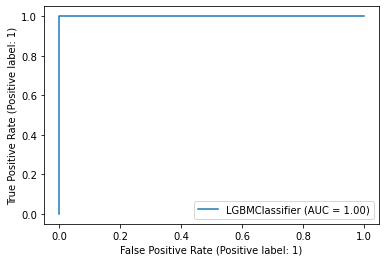

In [46]:
plot_roc_curve(clftree, X_test, y_test)

 # Phase 2 Part 2 Real Time data

In [57]:
# Load the libraries for data manipulation and loading
import pandas as pd
import numpy as np

import os

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [58]:
# Store the file names into two variables, one for bumps one for normal roads. os.listdir lists all the files present in a particular directory
bumps_file_name = os.listdir('C:/Users/data/Desktop/sha/Bumps')


normal_file_name = os.listdir('C:/Users/data/Desktop/sha//normal road')

In [59]:
# Load the sample file to see what all columns are present in the file. 
data = pd.read_csv("Bumps/20210713-336-52 pm-Cont.csv", header = 1)
data.head()

,Time,elapsed,x-acc,y-acc,z-acc,ax-vel,ay-vel,az-vel,gps-speed,gps-distance,acc-speed,acc-distance,course,lat,long,power,roll,pitch,yaw,altitude,flags,hAccuracy,xOffset,gps-accX,gps-accY,rawX,rawY,rawZ,magX,magY,magZ,baroAltitude,baroPressure
0,3:36:52.00 pm,0.00,0.164955,-0.374556,0.963745,-0.018710,0.362014,0.275150,9.572339,0.0,7.917559,0.157774,147.165009,53.81436,-1.583294,17.950889,-1.591628,-0.020444,-2.590694,73.883279,0,4.739307,-0.987939,0.130263,0.0,-1.042687,0.042531,0.103005,5.268581,7.075977,20.841768,80.626963,100.836517
1,3:36:52.02 pm,0.02,0.145447,-0.378747,0.954490,-0.022046,0.314497,0.248388,9.572339,0.0,7.947984,0.316136,147.165009,53.81436,-1.583294,19.773335,-1.583799,-0.020197,-2.590861,73.883279,768,4.739307,-0.985535,0.130263,0.0,-1.034911,0.036865,0.081026,5.266919,6.931478,20.798123,80.626963,100.836517
2,3:36:52.04 pm,0.04,0.097184,-0.375435,0.879099,-0.006169,0.154523,0.123496,9.572339,0.0,7.971777,0.475039,147.165009,53.81436,-1.583294,15.572606,-1.581293,-0.019820,-2.590940,73.883279,256,4.739307,-0.986386,0.130263,0.0,-0.961242,0.034580,0.030391,5.311201,6.697081,20.960867,80.626963,100.836517
3,3:36:52.06 pm,0.06,0.077720,-0.377318,0.894436,-0.004006,0.018547,0.018525,9.572339,0.0,7.988909,0.634351,147.165009,53.81436,-1.583294,11.317828,-1.584720,-0.019879,-2.590870,73.883279,768,4.739307,-0.990081,0.130263,0.0,-0.975039,0.021936,0.018357,5.210885,6.688252,21.106678,80.626963,100.836517
4,3:36:52.08 pm,0.08,0.094653,-0.387383,0.892448,0.010529,0.009595,-0.001036,9.572339,0.0,8.005797,0.793994,147.165009,53.81436,-1.583294,11.185579,-1.587203,-0.019920,-2.590733,73.883279,256,4.739307,-0.992975,0.130263,0.0,-0.977705,0.041129,0.029027,5.098820,6.819573,21.075951,80.626963,100.836517


## Data Preprocessing

In [60]:
# Store the column names of the file in a variable
col_names = data.columns

In [61]:
# Print the column names
col_names

Index(['Time', 'elapsed', 'x-acc', 'y-acc', 'z-acc', 'ax-vel', 'ay-vel',
       'az-vel', 'gps-speed', 'gps-distance', 'acc-speed', 'acc-distance',
       'course', 'lat', 'long', 'power', 'roll', 'pitch', 'yaw', 'altitude',
       'flags', 'hAccuracy', 'xOffset', 'gps-accX', 'gps-accY', 'rawX', 'rawY',
       'rawZ', 'magX', 'magY', 'magZ', 'baroAltitude', 'baroPressure'],
      dtype='object')

In [62]:
# Create an empty dataframe with column names, all the bumps files will be apended to this empty dataframe itself
bumps_df = pd.DataFrame(columns= col_names)
bumps_df

,Time,elapsed,x-acc,y-acc,z-acc,ax-vel,ay-vel,az-vel,gps-speed,gps-distance,acc-speed,acc-distance,course,lat,long,power,roll,pitch,yaw,altitude,flags,hAccuracy,xOffset,gps-accX,gps-accY,rawX,rawY,rawZ,magX,magY,magZ,baroAltitude,baroPressure


In [63]:
# Iterate over all the bump files one by one and append those to bumps_df. After 1st iteration, the 1st file will become the bumps_df. 
# After 2nd iteration, the 2nd file will get added to the 1st file and the combined file will become the bumps_df. 
# This will go on till the last file and all the files containing bumps data will be part of bumps_df. 
# An additional id column is also getting created to capture every file, later on the label of this file will also be attached using this id itself
for i in range(0, len(bumps_file_name)):
    data = pd.read_csv("Bumps/" + bumps_file_name[i], header = 1)
    data['id'] = int(i + 1)
    bumps_df = pd.concat([bumps_df, data], ignore_index=True)

In [64]:
# Filter out the 6 columns as we going to use these 6 columns only going forward
bumps_df = bumps_df[['id', 'Time', 'x-acc', 'y-acc', 'z-acc', 'gps-speed']]

In [65]:
# Check the length of bumps file, so that the id of the next normal file will be created after the last id of bumps file
len(bumps_file_name)

84

In [66]:
# Create an empty dataframe with column names, all the normal road files will be added to this empty dataframe itself
normal_df = pd.DataFrame(columns= col_names)
normal_df

,Time,elapsed,x-acc,y-acc,z-acc,ax-vel,ay-vel,az-vel,gps-speed,gps-distance,acc-speed,acc-distance,course,lat,long,power,roll,pitch,yaw,altitude,flags,hAccuracy,xOffset,gps-accX,gps-accY,rawX,rawY,rawZ,magX,magY,magZ,baroAltitude,baroPressure


In [67]:
# Iterate over all the normal road files one by one and add those to normal_df. After 1st iteration, the 1st file will become the normal_df. 
# After 2nd iteration, the 2nd file will get add to the 1st file and the combined file will become the normal_df. 
# This will go on till the last file and all the files containing normal road data will be part of normal_df. 
# An additional id column is also getting created to capture every file, later on the label of this file will also be attached using this id itself.
# The id starts from 85 as 84 files were present in the bumps df
for i in range(0, len(normal_file_name)):
    data = pd.read_csv("normal road/" + normal_file_name[i], header = 1)
    data['id'] = int(84 + i + 1)
    normal_df = pd.concat([normal_df, data], ignore_index=True)

In [68]:
# Filter out the 6 columns as we going to use these 6 columns only going forward
normal_df = normal_df[['id', 'Time', 'x-acc', 'y-acc', 'z-acc', 'gps-speed']]

In [69]:
# Concatenate all the bumps and normal files to create a master data frame, this master data frame will be used going forward
master_df = pd.concat([bumps_df, normal_df], ignore_index=True)

In [70]:
# Print the master df
master_df

,id,Time,x-acc,y-acc,z-acc,gps-speed
0,1.0,3:06:31.00 pm,0.422297,-0.019161,-0.913826,0.000000
1,1.0,3:06:31.02 pm,0.403117,-0.005946,-0.902797,0.000000
2,1.0,3:06:31.04 pm,0.418899,0.000899,-0.899642,0.000000
3,1.0,3:06:31.06 pm,0.454297,-0.025840,-0.909481,0.000000
4,1.0,3:06:31.08 pm,0.424886,0.026179,-0.872650,0.000000
...,...,...,...,...,...,...
34427,108.0,4:08:36.86 pm,-0.082573,0.045030,0.951826,4.798512
34428,108.0,4:08:36.88 pm,-0.092111,0.047553,0.959941,4.798512
34429,108.0,4:08:36.90 pm,-0.074466,0.035863,1.007244,4.798512
34430,108.0,4:08:36.92 pm,-0.083928,0.034097,0.978299,4.798512


In [71]:
# Check the length of normal file
len(normal_file_name)

24

In [72]:
# Create two series of true and false with length as the length of total bumps and normal road. These are the labels
y_series_bump = [True for i in range(0,85)]
y_series_normal = [False for i in range(0,24)]

In [73]:
# Combine all the true and false lists and convert it to series format, this will be used to select features and during model building
y = y_series_bump + y_series_normal
y = pd.Series(y)
y = y[1:]

## Feature Engineering

In [74]:
# Import the extract_features function from tsfresh library. This function will be used to extract the features from 4 times series columns, gps-speed, x-acc, y-acc and z-acc
 
from tsfresh import extract_features
extracted_features = extract_features(master_df, column_id="id", column_sort="Time")

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:43<00:00,  2.15s/it]


In [75]:
# Print the column names of extracted features, 4 columns have been created to 3148 columns now
extracted_features.columns

Index(['x-acc__variance_larger_than_standard_deviation',
       'x-acc__has_duplicate_max', 'x-acc__has_duplicate_min',
       'x-acc__has_duplicate', 'x-acc__sum_values', 'x-acc__abs_energy',
       'x-acc__mean_abs_change', 'x-acc__mean_change',
       'x-acc__mean_second_derivative_central', 'x-acc__median',
       ...
       'gps-speed__permutation_entropy__dimension_5__tau_1',
       'gps-speed__permutation_entropy__dimension_6__tau_1',
       'gps-speed__permutation_entropy__dimension_7__tau_1',
       'gps-speed__query_similarity_count__query_None__threshold_0.0',
       'gps-speed__matrix_profile__feature_"min"__threshold_0.98',
       'gps-speed__matrix_profile__feature_"max"__threshold_0.98',
       'gps-speed__matrix_profile__feature_"mean"__threshold_0.98',
       'gps-speed__matrix_profile__feature_"median"__threshold_0.98',
       'gps-speed__matrix_profile__feature_"25"__threshold_0.98',
       'gps-speed__matrix_profile__feature_"75"__threshold_0.98'],
      dtype='obje

In [76]:
# Since the number of feature is too high, it would be difficult and time consuming to train the model.  
# Not all the features contribute in predicting the y variable, hence using select_features function from tsfresh to filter out the featues which are impacting the y variable
# First use the impute function on the extracted feature, later on use the select_features function to filter out the most importat features. 

from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

C:\Users\data\anaconda3\lib\site-packages\tsfresh\utilities\dataframe_functions.py:171: RuntimeWarning: The columns ['x-acc__query_similarity_count__query_None__threshold_0.0'
 'y-acc__query_similarity_count__query_None__threshold_0.0'
 'z-acc__query_similarity_count__query_None__threshold_0.0'
 'gps-speed__friedrich_coefficients__coeff_0__m_3__r_30'
 'gps-speed__friedrich_coefficients__coeff_1__m_3__r_30'
 'gps-speed__friedrich_coefficients__coeff_2__m_3__r_30'
 'gps-speed__friedrich_coefficients__coeff_3__m_3__r_30'
 'gps-speed__max_langevin_fixed_point__m_3__r_30'
 'gps-speed__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(


In [77]:
# Print the filtered features which are contributing to the y variable
features_filtered.columns

Index(['y-acc__fft_coefficient__attr_"abs"__coeff_4',
       'y-acc__autocorrelation__lag_5',
       'y-acc__fft_coefficient__attr_"abs"__coeff_5',
       'x-acc__ar_coefficient__coeff_1__k_10',
       'y-acc__approximate_entropy__m_2__r_0.1',
       'y-acc__autocorrelation__lag_4',
       'x-acc__permutation_entropy__dimension_6__tau_1',
       'y-acc__fft_coefficient__attr_"abs"__coeff_2',
       'y-acc__lempel_ziv_complexity__bins_3', 'y-acc__autocorrelation__lag_7',
       'y-acc__lempel_ziv_complexity__bins_10',
       'z-acc__ar_coefficient__coeff_4__k_10',
       'x-acc__permutation_entropy__dimension_5__tau_1',
       'y-acc__approximate_entropy__m_2__r_0.7',
       'y-acc__partial_autocorrelation__lag_8',
       'y-acc__fourier_entropy__bins_100',
       'x-acc__agg_linear_trend__attr_"stderr"__chunk_len_10__f_agg_"var"',
       'y-acc__longest_strike_below_mean',
       'y-acc__approximate_entropy__m_2__r_0.9',
       'y-acc__autocorrelation__lag_6', 'y-acc__autocorrelation__

In [78]:
# Check the total length of the filtered features, these features will be used to train the model
len(features_filtered.columns)

48

## ML model building

In [79]:
# Print the 1st 5 rows of the features
features_filtered.head()

,"y-acc__fft_coefficient__attr_""abs""__coeff_4",y-acc__autocorrelation__lag_5,"y-acc__fft_coefficient__attr_""abs""__coeff_5",x-acc__ar_coefficient__coeff_1__k_10,y-acc__approximate_entropy__m_2__r_0.1,y-acc__autocorrelation__lag_4,x-acc__permutation_entropy__dimension_6__tau_1,"y-acc__fft_coefficient__attr_""abs""__coeff_2",y-acc__lempel_ziv_complexity__bins_3,y-acc__autocorrelation__lag_7,y-acc__lempel_ziv_complexity__bins_10,z-acc__ar_coefficient__coeff_4__k_10,x-acc__permutation_entropy__dimension_5__tau_1,y-acc__approximate_entropy__m_2__r_0.7,y-acc__partial_autocorrelation__lag_8,y-acc__fourier_entropy__bins_100,"x-acc__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""var""",y-acc__longest_strike_below_mean,y-acc__approximate_entropy__m_2__r_0.9,y-acc__autocorrelation__lag_6,y-acc__autocorrelation__lag_3,y-acc__sample_entropy,x-acc__permutation_entropy__dimension_4__tau_1,y-acc__ratio_value_number_to_time_series_length,y-acc__percentage_of_reoccurring_datapoints_to_all_datapoints,y-acc__percentage_of_reoccurring_values_to_all_values,"x-acc__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""var""",z-acc__range_count__max_1__min_-1,y-acc__autocorrelation__lag_8,z-acc__sum_of_reoccurring_values,z-acc__sum_of_reoccurring_data_points,y-acc__approximate_entropy__m_2__r_0.5,x-acc__ar_coefficient__coeff_5__k_10,gps-speed__ratio_value_number_to_time_series_length,"y-acc__fft_coefficient__attr_""abs""__coeff_24","y-acc__agg_autocorrelation__f_agg_""median""__maxlag_40",y-acc__lempel_ziv_complexity__bins_5,y-acc__autocorrelation__lag_9,x-acc__permutation_entropy__dimension_3__tau_1,gps-speed__range_count__max_1__min_-1,gps-speed__value_count__value_0,y-acc__autocorrelation__lag_2,"x-acc__fft_coefficient__attr_""abs""__coeff_91",y-acc__fourier_entropy__bins_10,"gps-speed__fft_coefficient__attr_""abs""__coeff_77",x-acc__number_peaks__n_1,gps-speed__count_below__t_0,y-acc__has_duplicate
1.0,0.025413,0.533996,0.049054,0.407941,0.748494,-0.144487,3.989643,0.070918,0.179054,0.982179,0.358108,0.218611,3.316895,0.330051,-0.624727,0.226363,8.592044e-07,2.0,0.320427,-0.839153,-0.259362,0.683233,2.508161,0.996622,0.006757,0.00339,4.125849e-07,296.0,-0.941805,-1.794253,-3.588506,0.322412,0.038508,0.003378,0.045356,0.021182,0.239865,0.712609,1.693235,296.0,296.0,0.632729,0.060818,0.090729,0.000000,125.0,1.0,1.0
2.0,0.623783,0.214045,1.354125,1.258862,0.723644,0.308991,4.870257,1.198141,0.198630,-0.053100,0.315068,0.428432,3.871340,0.609565,-0.008235,2.189997,1.293438e-04,14.0,0.453700,0.068402,0.418693,1.471171,2.741305,1.000000,0.000000,0.00000,2.695386e-05,178.0,-0.142181,0.000000,0.000000,0.818945,0.004967,0.023973,0.562051,0.086577,0.232877,-0.206479,1.663929,0.0,0.0,0.607718,0.650482,0.559443,1.448351,61.0,0.0,0.0
3.0,1.688661,0.525425,1.052468,1.680647,0.660169,0.574892,4.788943,3.242086,0.160839,0.362557,0.342657,0.386295,3.766977,0.548282,-0.013179,1.479552,1.304525e-04,20.0,0.392829,0.426344,0.633786,1.546728,2.677433,1.000000,0.000000,0.00000,1.730464e-05,150.0,0.295330,0.000000,0.000000,0.783272,-0.348314,0.020979,0.335213,0.367481,0.248252,0.260564,1.662890,0.0,0.0,0.730118,0.017003,0.278098,0.551016,59.0,0.0,0.0
4.0,1.910928,0.492853,2.913502,1.434043,0.592128,0.531643,4.642002,3.626943,0.186047,0.345003,0.353488,0.566264,3.598131,0.465877,0.040876,2.167878,1.529112e-04,22.0,0.342253,0.425136,0.584016,1.048864,2.561118,1.000000,0.000000,0.00000,2.971955e-05,103.0,0.297761,0.000000,0.000000,0.646528,-0.635099,0.023256,0.525683,0.287151,0.232558,0.238492,1.665328,0.0,0.0,0.694412,0.087611,0.738050,0.206134,45.0,0.0,0.0
5.0,1.673774,0.351916,4.102592,1.880258,0.605551,0.485559,4.363503,0.780486,0.217877,0.056940,0.385475,0.341216,3.412274,0.432077,-0.287872,1.709334,1.263823e-04,15.0,0.319293,0.184540,0.604145,1.189584,2.482185,1.000000,0.000000,0.00000,2.987574e-05,97.0,-0.111168,0.000000,0.000000,0.584727,-0.643993,0.022346,0.408266,0.063938,0.279330,-0.242403,1.613267,0.0,0.0,0.712056,0.219806,0.423186,0.241476,34.0,

In [80]:
# Rename the special characters using re library and rename function. 

import re
features_filtered = features_filtered.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [81]:
# Split the data into train and test data. 70% of the data goes to training data, 30% goes to testing data. 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_filtered, y, test_size=0.3, random_state=42)

In [82]:
# Install the lightgbm package
# pip install lightgbm

In [83]:
# Import the evaluation metrics and LGBMClassifier
from   sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve, precision_recall_curve, plot_precision_recall_curve
from   lightgbm import LGBMClassifier

In [84]:
#Store the classifier into clftree
clftree = LGBMClassifier(random_state=500)

In [85]:
#Use the fit function to train the model on training dataset
clftree.fit(X_train, y_train)

LGBMClassifier(random_state=500)

## ML Model Evaluation

In [86]:
# Get the predictions on the testing dataset. This is the data, model has never seen before
y_pred_lgbc = clftree.predict(X_test)

In [87]:
# Print the predicted values
y_pred_lgbc

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
       False,  True,  True,  True, False,  True])

In [88]:
# Check the accuracy score using the y_test and y_pred_lgbc values inside accuracy_score function
print("\n Accuracy : \n",accuracy_score(y_test, y_pred_lgbc))


 Accuracy : 
 0.8484848484848485


In [89]:
# To be double sure about the performance of the model check few more evaluation metrics - Confusion Matrix and Classification Report
print("\n Confusion Matrix : \n",confusion_matrix(y_test, y_pred_lgbc))
print("\n Classification Report : \n",classification_report(y_test, y_pred_lgbc))


 Confusion Matrix : 
 [[ 3  2]
 [ 3 25]]

 Classification Report : 
               precision    recall  f1-score   support

       False       0.50      0.60      0.55         5
        True       0.93      0.89      0.91        28

    accuracy                           0.85        33
   macro avg       0.71      0.75      0.73        33
weighted avg       0.86      0.85      0.85        33



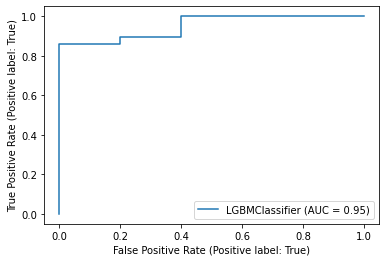

In [90]:
# To visualize the true positive rate and false positive rate, use the ROC curve
plot_roc_curve(clftree, X_test, y_test)

## Handle the problem of Class Imbalance

In [91]:
# Since the data is imablanced, import the RandomOverSampler function from imblearn to upsample the minority class
from   imblearn.over_sampling import RandomOverSampler

In [92]:
# Store the RandomOverSampler function in variable names ros

ros = RandomOverSampler(random_state=500)
X_train_ros, y_train_ros = ros.fit_resample(features_filtered, y)
y_train_ros.value_counts()

True     84
False    84
dtype: int64

In [93]:
# Now we have more data, so split 60% data into training and 40% into testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_ros, y_train_ros, test_size=0.4, random_state=42)

In [94]:
#Store the classifier into clftree
clftree = LGBMClassifier(random_state=0)

In [95]:
#Use the fit function to train the model on training dataset
clftree.fit(X_train, y_train)

LGBMClassifier(random_state=0)

In [96]:
# Get the accuracy score of the model
clftree.score(X_test,y_test)

0.9558823529411765